<a href="https://colab.research.google.com/github/tejas1011g/Urban-Futures-Designing-Inclusive-and-Resilient-Human-Settlements/blob/main/Urban%20Futures%3A%20Designing%20Inclusive%20and%20Resilient%20Human%20Settlements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
pip install tensorflow

In [115]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [116]:
df = pd.read_csv("/content/urban_sustainability_data.csv")

In [117]:
np.random.seed(42)
df['Sustainability_Score'] = (
    0.2 * df['Affordable_Housing_Index'] +
    0.2 * df['Access_Public_Transport'] -
    0.15 * df['Slum_Percentage'] +
    0.1 * df['Green_Cover_Percentage'] + # Assuming Green_Area_per_Capita_m2 is Green_Cover_Percentage
    0.1 * df['Disaster_Risk_Index'] -  # Assuming Disaster_Readiness_Score is Disaster_Risk_Index
    0.1 * df['PM25_Level'] + # Assuming Air_Quality_Index is PM25_Level
    0.15 * df['Road_Connectivity_Index'] + # Assuming Inclusive_Governance_Score is Road_Connectivity_Index
    np.random.normal(0, 2, len(df))
)

In [118]:
X = df.drop(columns=['City', 'Sustainability_Score', 'Country', 'High_Risk_Area'])
y = df['Sustainability_Score']

In [119]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)

In [120]:
train_errors = []
val_errors = []
n_estimators_list = list(range(10, 100, 10))

for n in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n, random_state=1)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_errors.append(train_mae)
    val_errors.append(val_mae)


In [124]:
print(f"Test Mean Absolute Error: {train_mae:.2f}")


Test Mean Absolute Error: 1.55


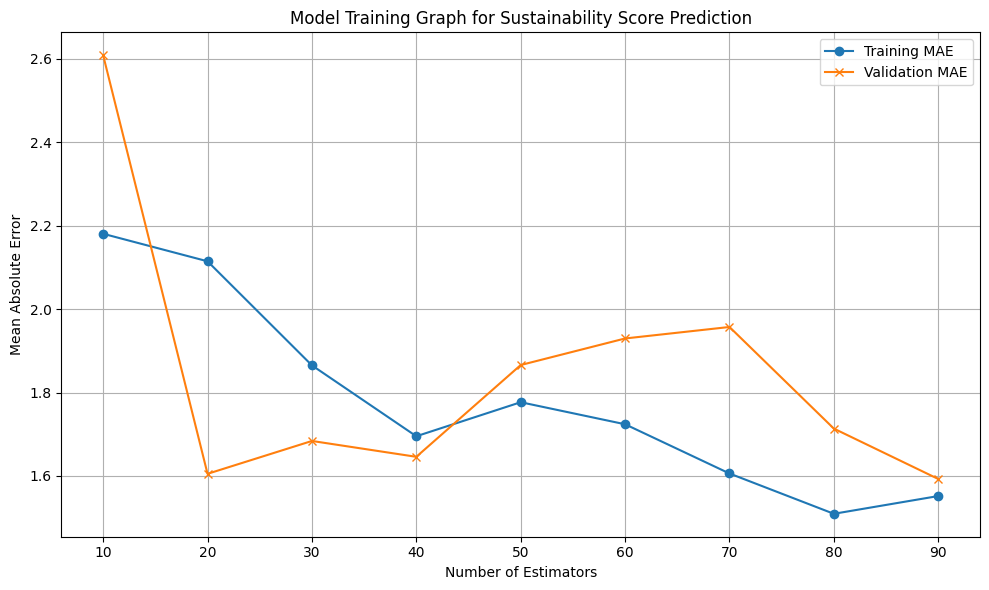

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_errors, label='Training MAE', marker='o')
plt.plot(n_estimators_list, val_errors, label='Validation MAE', marker='x')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('Model Training Graph for Sustainability Score Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [122]:
# del df, X, y, X_train, X_val, y_train, y_val, model
# del train_errors, val_errors, n_estimators_list, y_train_pred, y_val_pred, train_mae, val_mae
plt.clf()
plt.close()
print("Graph created and reset.")

Graph created and reset.
